<a href="https://colab.research.google.com/github/ingrid1017/EjercicioRA2/blob/main/Perceptr%C3%B3n_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1: Importar las bibliotecas necesarias

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


#Paso 2: Cargar y preprocesar los datos

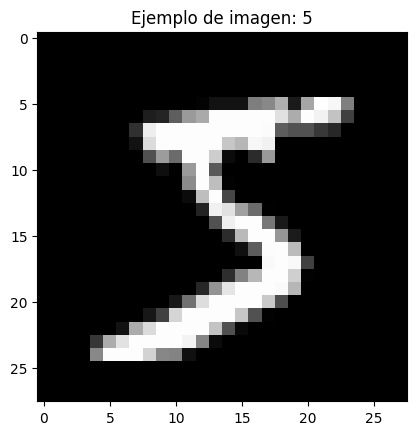

In [3]:
#Cargar le conjunto  de datos MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Normalizar los datos (Valores entre 0 y 1 )
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Visualizar un ejemplo de los datos
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Ejemplo de imagen: {y_train[0]}')
plt.show()

#Convertir las etiquetas a formato "one-hot" (10 categorias)
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

#Paso 3: Construir el modelo de Perceptrón Multicapa

In [4]:
#Crear el modelo del Perceptron Multicapa
model = Sequential()

#Aplanar las imagenes de 28x28 en un vector de 784
model.add(Flatten(input_shape=(28,28)))

#Añadir la primera capa oculta con 128 neuronas y activación ReLU
model.add(Dense(128, activation='relu'))

#Añadir la segunda capa oculta con 64 neuronas y activacion ReLU
model.add(Dense(64, activation='relu'))

#Añadir la capa de salida con 10 neuronas (una por clase) y activacion Softmax
model.add(Dense(10, activation='softmax'))

#Compilar el modelo  con optimizador Adam y función de pérdida categorica
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Paso 4: Entrenar el modelo

In [5]:
#Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8779 - loss: 0.4228 - val_accuracy: 0.9591 - val_loss: 0.1278
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9686 - loss: 0.1026 - val_accuracy: 0.9677 - val_loss: 0.0971
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9786 - loss: 0.0694 - val_accuracy: 0.9719 - val_loss: 0.0916
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9860 - loss: 0.0476 - val_accuracy: 0.9754 - val_loss: 0.0827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9779 - val_loss: 0.0810
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9896 - loss: 0.0299 - val_accuracy: 0.9777 - val_loss: 0.0769
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9796 - val_loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9938 - loss: 0.

#Paso 5: Evaluar el modelo

In [6]:
#Evaluar el modelo en los datos de prueba
test_loss, test_accuaracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuaracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.1044
Precisión en el conjunto de prueba: 0.9787


#Paso 6: Visualizar los resultados

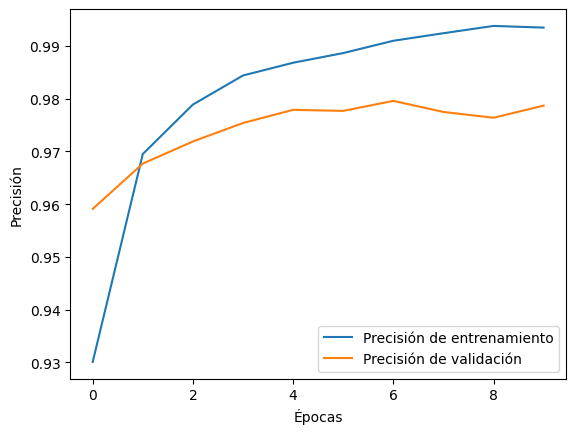

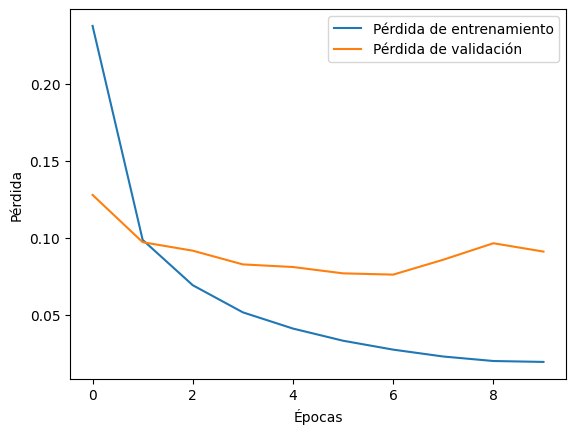

In [7]:
#Graficar la presición de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

#Graficar la perdida en entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
